<a href="https://colab.research.google.com/github/stutkhd/excercise_logistics/blob/master/%E5%A4%9A%E6%96%AD%E7%89%87%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C
### 1.1 ベンチマーク問題例TSPLIBを使う場合

#多断片法とは

In [43]:
def strnum_to_num(t):
    num=t.split("e+")
    r=float(num[0])
    if len(num)==2:
        r *= 10**int(num[1])
    return r

def read_tsp_file(instance):
    if instance[:4]=="http":
        import urllib.request
        with urllib.request.urlopen(instance) as f:
            with open('tmp.txt', 'w') as g:
                print(f.read().decode(), file=g)
                instance="tmp.txt"
        
    with open(instance,"r") as f:
        for i in range(6):
            line=f.readline().rstrip("\n")        
        C={}
        for line in f.readlines():
            node=line.rstrip("\n").split()
            name=node[0]            
            if name == "EOF":
                break
            if node[0]=='NODE_COORD_SECTION':
                continue
            x,y=strnum_to_num(node[1]),strnum_to_num(node[2])
            C[name]=(x,y)
        return C
    
instance="http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/ch130.tsp"
D=read_tsp_file(instance)

In [47]:
C = {}
for k, v in D.items():
    C[int(k)-1] = v

### 1.2 ランダムなデータを使う場合

In [1]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

## 2. distanceとgraph_of_tourの定義

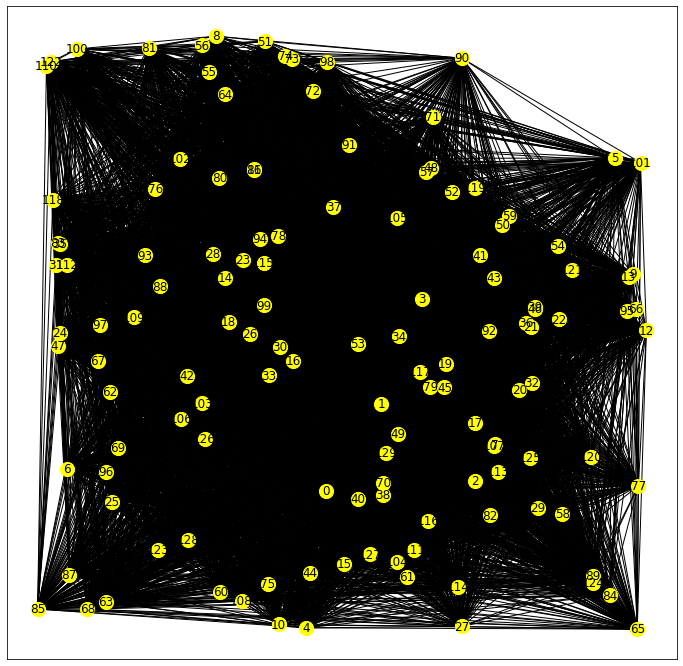

In [48]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

G = nx.Graph()

for v in C:
    G.add_node(v)
for i, ci in enumerate(C):
    for j, cj in enumerate(C):
        if i < j:
            G.add_edge(ci, cj, weight=distance(C[ci], C[cj]))
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(G,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1)
plt.show() 

In [3]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [57]:
import time

def multi_fragment_method():
    E_sol = [] #作成途中の巡回路の集合
    E_rest = [(distance(C[ci], C[cj]), (int(ci), int(cj))) for i, ci in enumerate(C) for j, cj in enumerate(C) if i<j] # E_solに追加するかまだ計算していない枝の集合
    E_rest.sort(reverse=True) #小さい順から判別するが、popを使いやすいように降順に並び替える
    delta = {i:0 for i in C} #E_sol での点vの次数(枝の数)
    theta = {i:i for i in C} #点vからE_solの枝を通ってたどり着く端点

    while len(E_sol) < len(C)-1:
        d, (i,j) = E_rest.pop()

        #次数が３の点ができてしまうため追加しない
        if delta[i] == 2 or delta[j] == 2:
            continue
        # 部分巡回路ができてしまうため,E_solに(u, v)を追加しない
        # iの次数が1, (i, j)が追加される予定で、iとjの端点がどちらもそれぞれj, iとなっている場合
        elif delta[i] == 1 and theta[i] == j:
            continue
        else:
            E_sol.append((i, j))
            # 次数追加
            delta[i] += 1
            delta[j] += 1
            
            # 現在の端点取得
            p = theta[i]
            q = theta[j]
            #お互いが端点になる
            theta[p] = q
            theta[q] = p
    # 次数１の点が二つ存在するから追加する
    keys = [k for k,v in delta.items() if v==1]
    key = tuple(keys)
    E_sol.append(key)
    return E_sol

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''
    starttime=time.time()
    while time.time() - starttime < timelimit:
        E_sol = multi_fragment_method()
        
    return E_sol

E_sol=tsp_solve(C,3)

## 4. 解tourの描画と実行可能性

size of tour: 7844.935432532648
feasibility: True


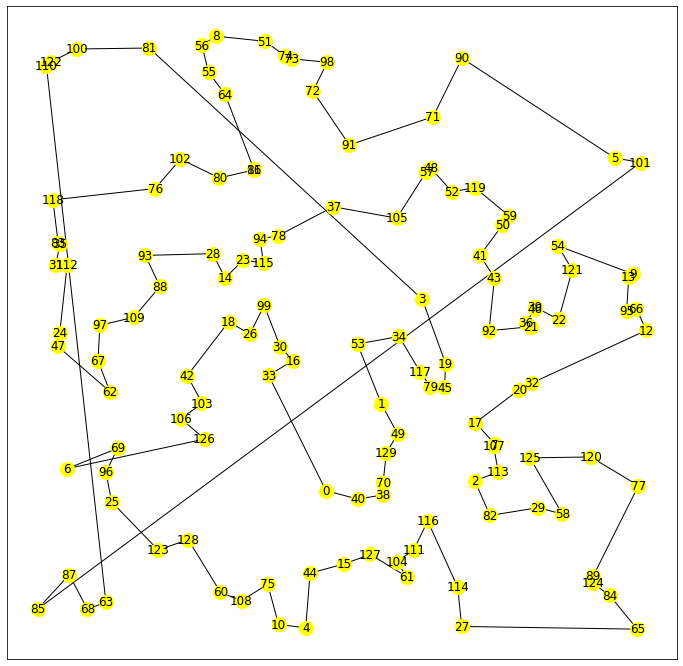

In [58]:
Gt=nx.Graph()
for t in E_sol:
    Gt.add_edge(t[0], t[1], weight=(distance(C[t[0]], C[t[1]])))
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1)
plt.show() 